# Language Identification Model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from IPython.display import display
from sklearn.pipeline import Pipeline
import pickle

In [2]:
language_data = pd.read_csv('dataset.csv')

In [3]:
# This function provides all information about the dataset

def dataset_info(dataset):
    
    print("Information about dataset,")
    
    print(f"\n1. Dataset shape: {dataset.shape}")
    
    print(f"\n2. Dataset size: {dataset.size}")
    
    print(f"\n3. First 5 data:")
    display(dataset.head())
    
    print(f"\n4. Last 5 data:")
    display(dataset.tail())
    
    print(f"\n5. Random 10 data:")
    display(dataset.sample(10))
    
    print(f"\n6. All columns datatypes: \n\n{dataset.dtypes}")
    
    print(f"\n7. statistics values of dataset: ")
    display(dataset.describe())
    
    print(f"\n8. Total Null values: \n\n{dataset.isnull().sum()}")

    print(f"\n9. Total Duplicated values: {dataset.duplicated().sum()}")
    
    return

In [4]:
all_info = dataset_info(language_data)
all_info

Information about dataset,

1. Dataset shape: (22000, 2)

2. Dataset size: 44000

3. First 5 data:


,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch



4. Last 5 data:


,Text,language
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese
21999,aprilie sonda spațială messenger a nasa și-a ...,Romanian



5. Random 10 data:


,Text,language
8960,sichuan es un asteroide perteneciente al cint...,Spanish
10459,대구광역시大邱廣域市는 대한민국 동남부 내륙에 있는 광역시이다 동쪽으로 경상북도 경산...,Korean
5069,het was een initiatief van een groep vierdejaa...,Dutch
15981,navotas se percibe como propensa a las inundac...,Spanish
988,quando o elmo e o timbre são ostentados costum...,Portugese
2754,i omgivningarna runt carter island växer i huv...,Swedish
14503,दक्षिण भारत में लड़कियां अक्सर पारंपरिक कार्यो...,Hindi
17237,दक्षिण भोपाल से किलोमीटर दूर स्थित भीमबेटका क...,Hindi
7327,arx regia windesoriensis vulgo windsor castle ...,Latin
12846,الاذاعة هي تكنولوجيا تستخدم موجات الراديو لنقل...,Arabic



6. All columns datatypes: 

Text        object
language    object
dtype: object

7. statistics values of dataset: 


,Text,language
count,22000,22000
unique,21859,22
top,haec commentatio automatice praeparata res ast...,Estonian
freq,48,1000



8. Total Null values: 

Text        0
language    0
dtype: int64

9. Total Duplicated values: 141


## 1. Data cleaning 

### Create a copy of the original dataset

In [5]:
df = language_data.copy()
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


### remove duplicated values


In [6]:
df.duplicated().sum()

141

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

### remove 'Tamil' and 'Japanese' language data

In [9]:
df[df['language'] == 'Tamil'].sample(10)

,Text,language
1950,நாலூர் ஊராட்சி nalur gram panchayat தமிழ்நாட்ட...,Tamil
2581,ஜானகி இராமச்சந்திரன் நவம்பர் – மே janaki r...,Tamil
5484,இக்கோயில் தொகுப்புக் கோயில் என்ற வகைப்பாட்டில்...,Tamil
11785,மே -இல் மணிலாவில் பிலிப்பைன்சு இக்கூட்டமைப்பு...,Tamil
11700,திருவனந்தபுரம் மெயில் ஆம் ஆண்டு என்ற வண்டி எ...,Tamil
12508,தவறான மனித செயற்பாடுகளால் கடல் மற்றும் கடற்கரை...,Tamil
10650,வேளாண்மை தமிழரின் முதன்மையான தொழிலாகவும் மிகுந...,Tamil
19824,மீனவர்கள் விசைப்படகுகளின் மூலம் மீன் பிடிக்கும...,Tamil
8057,இங்குக் கோயில் குளம் கோயில் தேர் போன்றவை உள்ளன...,Tamil
18905,கொமாரபாளையம் ஊராட்சி komarapalayam gram pancha...,Tamil


In [10]:
df['language'].nunique()

22

In [11]:
# remove language

df = df[df['language'] != 'Tamil'] 

In [12]:
df['language'].nunique()

21

### Checking null values

In [13]:
df.isnull().sum()

Text        0
language    0
dtype: int64

## 2. Exploratory Data Analysis (EDA)


/tmp/ipykernel_11964/2038429248.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['language'].value_counts(), palette='viridis')


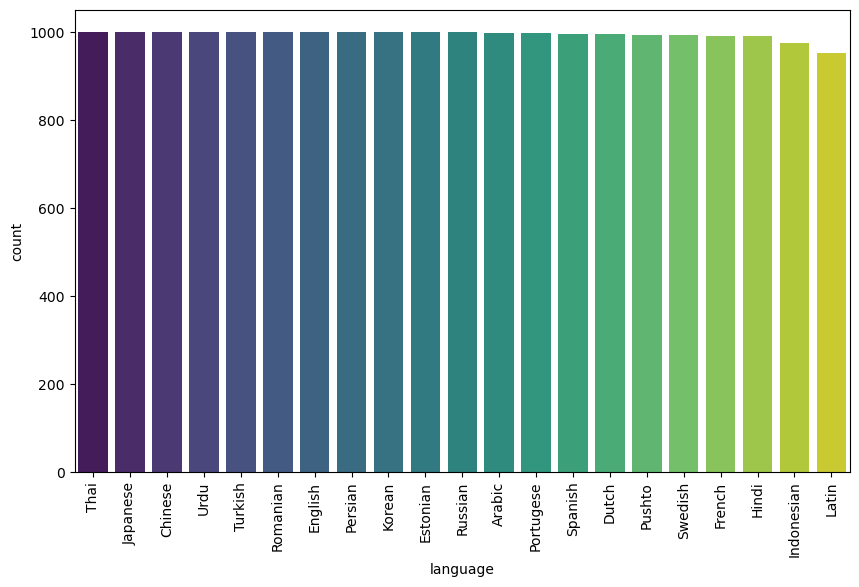

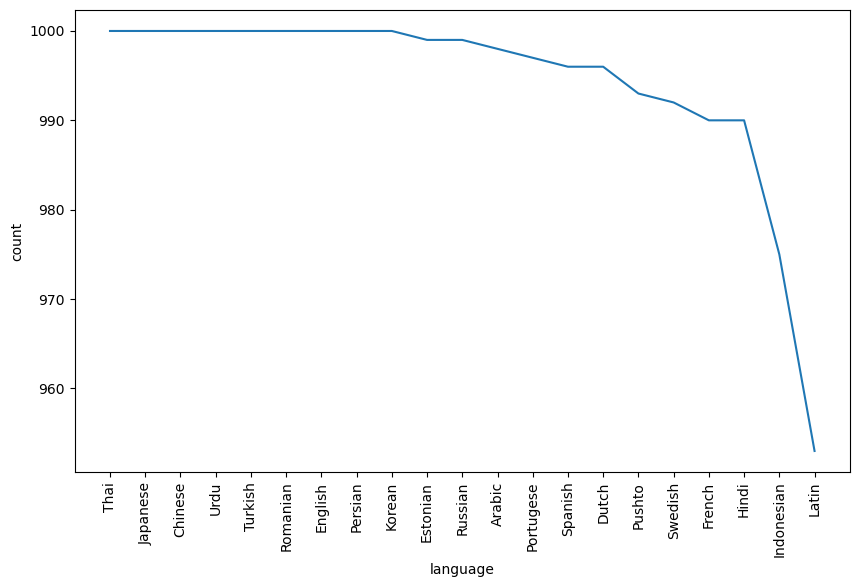

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(df['language'].value_counts(), palette='viridis')
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(df['language'].value_counts())
plt.xticks(rotation='vertical')
plt.show()

## 3. Model building 

In [15]:
X = df['Text']
y = df['language']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.3) 


1. accuracy score of all models


,model_name,accuracy_score
0,Multinomial_NB,0.952427
1,SVM,0.939655
2,Logistic Regression,0.948116



2. Graphical representation of all model accuracy score


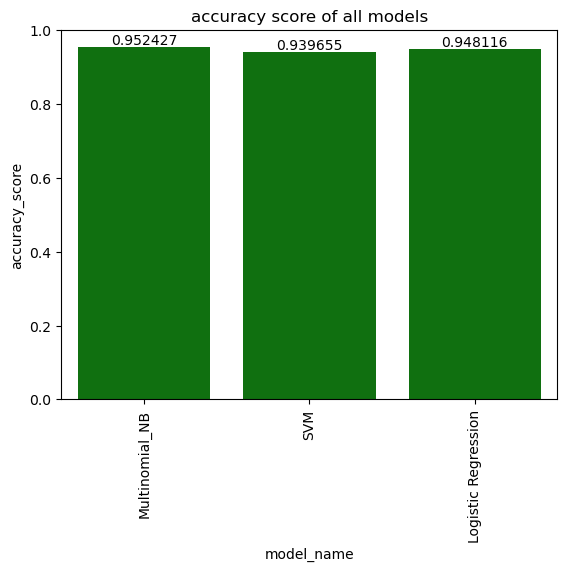

In [16]:
def all_in_one():

    mnb = MultinomialNB()
    svm = SVC(kernel='linear')
    lr = LogisticRegression()
    cv = CountVectorizer()

    pipe_mnb = Pipeline(steps=[('cv', cv), ('mnb', mnb)])

    pipe_svm = Pipeline(steps=[('cv', cv), ('svm', svm)])

    pipe_lr = Pipeline(steps=[('cv', cv), ('lr', lr)])
    
    pipe = [pipe_mnb, pipe_svm, pipe_lr]
    model_list = ['Multinomial_NB', 'SVM', 'Logistic Regression']
    
    model_score = []
    y_pred_list = []
    for i in range(len(pipe)):
        pipe[i].fit(X_train,y_train)
        y_pred = pipe[i].predict(X_test)
        model_score.append([model_list[i], accuracy_score(y_test, y_pred)])
        y_pred_list.append(y_pred)

    model_score_df = pd.DataFrame(model_score,columns=['model_name', 'accuracy_score'])
    print('\n1. accuracy score of all models')
    display(model_score_df)
    
    # Graphical representation of all model accuracy score
    print('\n2. Graphical representation of all model accuracy score')
    ax = sns.barplot(x=model_score_df['model_name'], y=model_score_df['accuracy_score'], color='green')
    plt.xticks(rotation='vertical')
    ax.bar_label(ax.containers[0])
    plt.title('accuracy score of all models')
    plt.show()
    
    return pipe, y_pred_list

all_info = all_in_one()

In [17]:
all_info

([Pipeline(steps=[('cv', CountVectorizer()), ('mnb', MultinomialNB())]),
  Pipeline(steps=[('cv', CountVectorizer()), ('svm', SVC(kernel='linear'))]),
  Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])],
 [array(['Swedish', 'Pushto', 'Turkish', ..., 'Arabic', 'Russian', 'Korean'],
        dtype='<U10'),
  array(['Swedish', 'Pushto', 'Turkish', ..., 'Arabic', 'Russian', 'Korean'],
        dtype=object),
  array(['Swedish', 'Pushto', 'Turkish', ..., 'Arabic', 'Russian', 'Korean'],
        dtype=object)])

In [18]:
pipe_mnb = all_info[0][0]

In [19]:
y_pred_mnb = all_info[1][0]

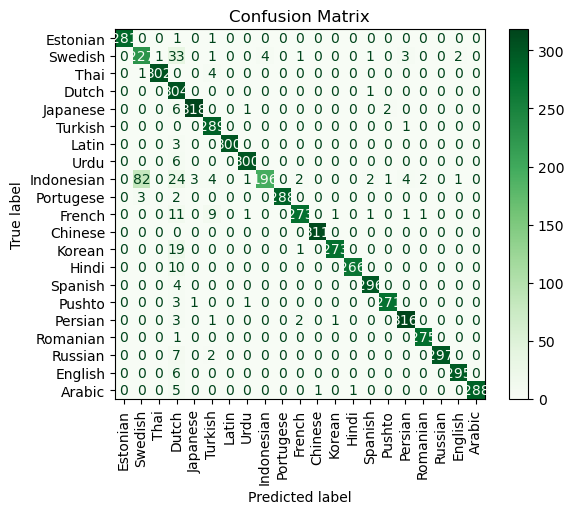

In [20]:
cm = confusion_matrix(y_test, y_pred_mnb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels= list(df['language'].unique()))
disp.plot(cmap = plt.cm.Greens)
plt.title('Confusion Matrix')
plt.xticks(rotation='vertical')
plt.show()

In [21]:
print(classification_report(y_test, y_pred_mnb))

              precision    recall  f1-score   support

      Arabic       1.00      0.99      1.00       283
     Chinese       0.73      0.83      0.77       273
       Dutch       1.00      0.98      0.99       307
     English       0.68      1.00      0.81       305
    Estonian       0.99      0.97      0.98       327
      French       0.93      1.00      0.96       290
       Hindi       1.00      0.99      1.00       303
  Indonesian       0.99      0.98      0.98       306
    Japanese       0.98      0.61      0.75       322
      Korean       1.00      0.98      0.99       293
       Latin       0.98      0.92      0.95       298
     Persian       1.00      1.00      1.00       311
   Portugese       0.99      0.93      0.96       293
      Pushto       1.00      0.96      0.98       276
    Romanian       0.98      0.99      0.99       300
     Russian       0.99      0.98      0.99       276
     Spanish       0.97      0.98      0.98       323
     Swedish       0.99    

In [22]:
pipe_mnb.predict(['你好吗گ'])[0]

'Chinese'

In [25]:
pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(pipe_mnb, open('model.pkl', 'wb'))